# **Solar Low Energy X-ray Spectrometer (SoLEXS)**

## **Introduction**

**Aditya-L1** is India’s first space-based solar mission developed by the Indian Space Research Organisation (ISRO). **Launched on 2 September 2023**, the spacecraft was inserted in a halo orbit around Lagrangian point 1 (L1) of the Sun-Earth system on 6 January 2024.
Solar Low Energy X-ray Spectrometer (SoLEXS), one of the payloads on Aditya-L1, is a **sun-as-a-star spectrometer in the energy range of 2 keV to 22 keV**.
It employs **Silicon Drift Detector (SDD)** as sensor element to detect energy. SDD is particularly suited for solar soft X-ray flux monitoring because of its high-event rate handling capability ($\sim$ 10$^5$ counts/second) and low noise performance with **energy FWHM of $\sim$170 eV at 5.9 keV**. The on-board processing unit histograms the recorded energies of the X-ray events to build a spectrum every second to capture the impulsive solar activity. To cover an extensive dynamic range from A class to X class flares, the payload has **two apertures with geometric areas of 7.1 and 0.1 mm$^2$**.
This notebook serves as an introduction to the SoLEXS L1 data products. For more information, please refer to the following.

1. Sankarasubramanian, K. et al. "Solar Low Energy X-ray Spectrometer (SoLEXS) on Board Aditya-L1 Mission". Sol Phys 300, 87 (2025). DOI: https://doi.org/10.1007/s11207-025-02494-0


2. Abhilash R. Sarwade et al. "Solar Low Energy X-ray Spectrometer on board Aditya-L1: ground calibration and in-flight performance," Journal of Astronomical Telescopes, Instruments, and Systems 11(4), 045005 (30 October 2025). 
 DOI: https://doi.org/10.1117/1.JATIS.11.4.045005, arXiv:2509.26292v2
 
3. [SoLEXS Data Analysis Guide](https://pradan1.issdc.gov.in/al1/protected/downloadFile/solexs/SoLEXS-UserManual.pdf)

![Schematic of SoLEXS instrument](img/solexs_schematic_consolidated.png)
(a) A front view of the integrated SoLEXS package, showing the Detector Module (top) and the Electronics Module (bottom), which are thermally isolated by GFRP spacers. Aperture cover mechanism (grey) is visible on the outside of the detector module. 

(b) An internal front view of the package with the detector module’s top cover removed, revealing the two SDDs (yellow) mounted on the PCB (green). The imaginary FOVs are shown originating from the two apertures on the front plate: the blue FOV for the large-aperture SDD1 and the red FOV for the small-aperture SDD2. 

(c) A close-up back view of the detector module
with the top cover removed, showing the internal calibration source encapsulated in its Aluminium
holder (grey) and the Copper thermal flanges (brown).

# SoLEXS Specifications

| Parameter                             | Specification                                              |
| ------------------------------------- | ---------------------------------------------------------- |
| Energy Range                          | 2 $-$ 22 keV                                             |
| Energy Resolution                     | $<$ 170 eV @ 5.9 keV                                       |
| Time Cadence                          | Spectral Channel: 1 second<br>Temporal Channel: 1 second |
| Detector                              |                                                            |
| Type                                  | Silicon Drift Detector (SDD)                               |
| Number                                | 2 (named SDD1 & SDD2)                                      |
| Active Area                           | 30 ${mm}^2$                                                |
| Thickness                             | 450 $\pm$ 20 $\mu m$                                       |
| Entrance Window                       | 8 $\mu m$ thick Be                                         |
| Aperture Area                         | SDD1: 7.106 ${mm}^2$<br>SDD2: 0.106 ${mm}^2$               |
| Field of View                         | SDD1: $\pm$ 1.8$^{\circ}$ <br>SDD2: $\pm$ 1.3$^{\circ}$    |
| Calibration Source                    | Fe-55 with Ti foil                                         |
| Digital Pulse Processing parameters   |                                                            |
| Pulse peaking time (triangular pulse) | Spectral Channel: 2 $\mu$s <br>Temporal Channel: 0.35 $\mu$s|
| Number of channels in the spectrum    | 340                                                        |
| Channel Width                         | 1 -- 168 channel: 47.75 eV <br> 169 -- 340 channel: 95.5 eV|
| Payload Parameters                    |                                                            |
| Mass                                  | ~ 4 kg                                                     |
| Power                                 | ~ 18 W                                                     |
| Raw Data Volume                       | 1.03 Gb per 24 hours                                       |

## **Data Download**
The SoLEXS data is hosted on the [PRADAN website](https://pradan.issdc.gov.in/pradan/al1), where it is made available in a day-wise format. Users can select and download the required files using various options provided on the website.


This notebook uses data from SOL-2024-10-25 (v1.1) as an example. To follow along, please download and extract the corresponding data for this date from the [PRADAN website](https://pradan.issdc.gov.in/pradan/al1) before running the notebook.

![Pradan](img/solexs_pradan_example.png)

## **Data Products and Software**

### **L1 Data:**
- Light Curve file ($.lc$ file)
- Type II Pulse Height Amplitude (PHA) file ($.pi$ file)
- Good Time Interval file ($.gti$ file)
- House Keeping file ($.hk$ file)

### **Calibration Database:**
- Deadtime Correction
- Auxiliary Response File (ARF)
- Redistribution Matrix File (RMF)

### **`SoLEXS_Tools` Software**

In [52]:
ls AL1_SLX_L1_20241025_v1.1/

SDD1/  SDD2/


In [53]:
ls AL1_SLX_L1_20241025_v1.1/SDD2 -l

total 9864
-rw-r--r-- 1 abhilash abhilash    1057 Jan 13 05:19 AL1_SOLEXS_20241025_SDD2_L1.gti.gz
-rw-r--r-- 1 abhilash abhilash 1551026 Jan 13 05:19 AL1_SOLEXS_20241025_SDD2_L1.hk.gz
-rw-r--r-- 1 abhilash abhilash  283400 Jan 13 05:19 AL1_SOLEXS_20241025_SDD2_L1.lc.gz
-rw-r--r-- 1 abhilash abhilash 8255681 Jan 13 05:19 AL1_SOLEXS_20241025_SDD2_L1.pi.gz


In [36]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
from astropy.io import fits

import datetime

import os
import glob

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use(['science','notebook','grid'])

import matplotlib.dates as mdates
import matplotlib.ticker as mticker

plt.rcParams.update({'font.size': 18})


## Lightcurve Data

In [37]:
lc_file = 'AL1_SLX_L1_20241025_v1.1/SDD2/AL1_SOLEXS_20241025_SDD2_L1.lc.gz'

hdu_lc = fits.open(lc_file)
lc_data = hdu_lc[1].data

In [38]:
hdu_lc[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                86400 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
EXTNAME = 'RATE    '           / Extension name                                 
CONTENT = 'LIGHT CURVE'        / File content                                   
HDUCLASS= 'OGIP    '           / format conforms to OGIP standard               
HDUVERS = '1.1.0   '           / Version of format (OGIP memo CAL/GEN/92-002a)  
HDUDOC  = 'OGIP memos CAL/GE

In [39]:
def timestamp2datetime(timestamp_arr):
    datetime_arr = []
    for ta in timestamp_arr:
        datetime_arr.append(datetime.datetime.fromtimestamp(ta, tz=datetime.timezone.utc))

    return datetime_arr

lc_datetime = timestamp2datetime(lc_data['TIME'])

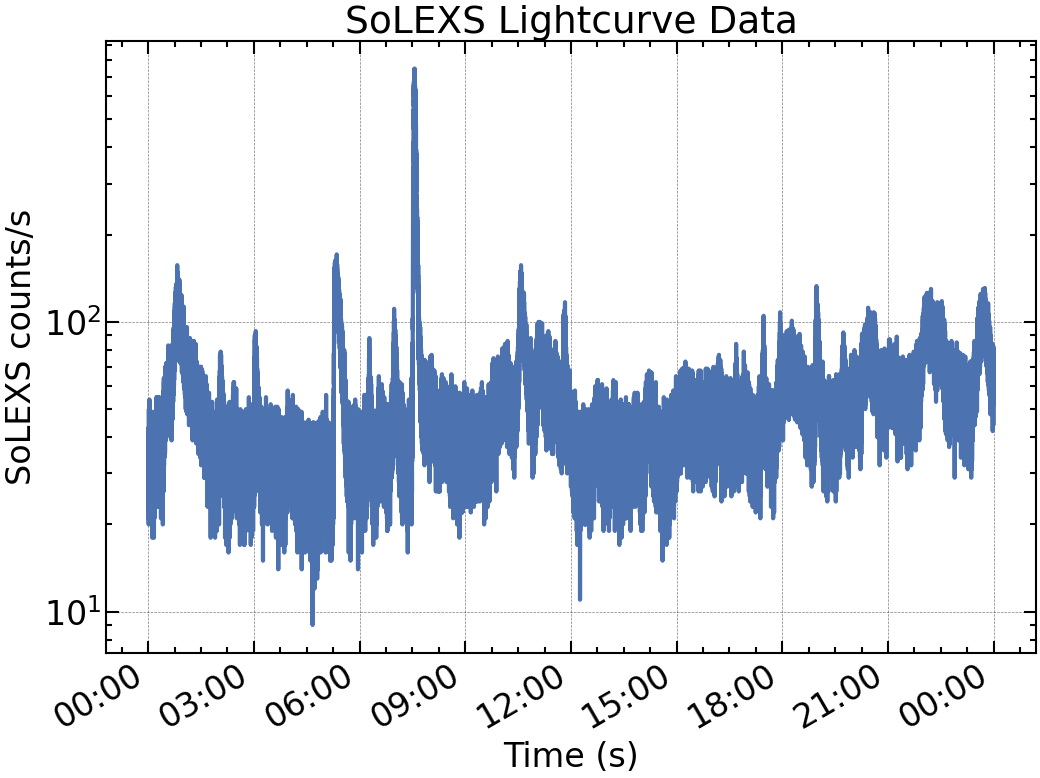

In [40]:
fig, ax = plt.subplots()
ax.plot(lc_datetime,lc_data['COUNTS'],ms=0,ls='-',lw=3)
ax.set_yscale('log')
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'SoLEXS counts/s')
ax.set_title('SoLEXS Lightcurve Data');

ax.xaxis.set(major_formatter=mdates.DateFormatter(r"%H:%M"))
fig.autofmt_xdate()

In [41]:
def rebin_lc(lc, time_arr ,rebin_sec): #lc: counts per second
    datetime_arr = time_arr
    extra_bins = len(lc) % rebin_sec
    if extra_bins != 0:
        lc = lc[:-extra_bins]
    new_bins = int(len(lc)/rebin_sec)
    new_lc = lc.reshape((new_bins, rebin_sec)).sum(axis=1)
    new_tm = np.arange(new_bins)*rebin_sec


    new_datetime_arr = []
    for ii in new_tm:
        new_datetime_arr.append(datetime_arr[int(ii)])

    new_lc = new_lc/rebin_sec 

    return new_lc, new_datetime_arr

In [42]:
rebin_sec = 60
lc_60, time_arr_60 = rebin_lc(lc_data['COUNTS'],lc_data['TIME'],rebin_sec)
datetime_arr_60 = timestamp2datetime(time_arr_60)

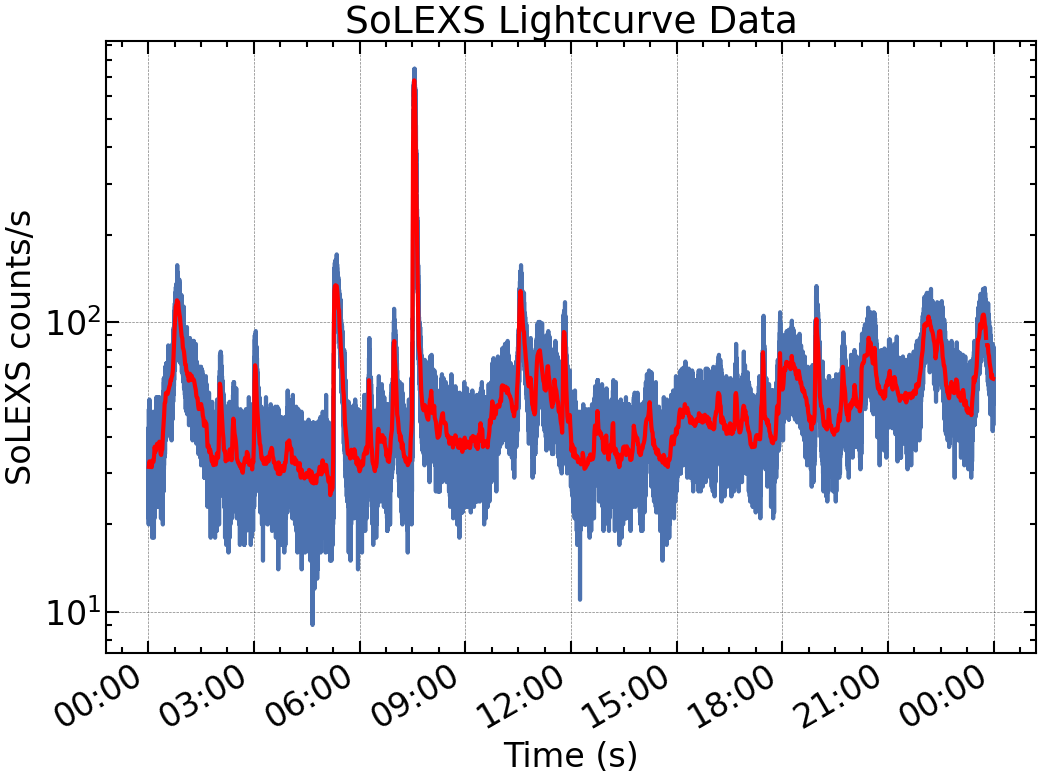

In [43]:
fig, ax = plt.subplots()
ax.plot(lc_datetime,lc_data['COUNTS'],ms=0,ls='-',lw=3)
ax.plot(datetime_arr_60,lc_60,ms=0,ls='-',lw=3,color='r')

ax.set_yscale('log')
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'SoLEXS counts/s')
ax.set_title('SoLEXS Lightcurve Data');
ax.xaxis.set(major_formatter=mdates.DateFormatter(r"%H:%M"))
fig.autofmt_xdate()

## Spectral Data

In [44]:
pi_file = 'AL1_SLX_L1_20241025_v1.1/SDD2/AL1_SOLEXS_20241025_SDD2_L1.pi.gz'
hdu_pi = fits.open(pi_file)
pi_data = hdu_pi[1].data

In [45]:
hdu_pi[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5468 / length of dimension 1                          
NAXIS2  =                86400 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
EXTNAME = 'SPECTRUM'           / Extension name                                 
CONTENT = 'OGIP PHA data'      / File content                                   
HDUCLASS= 'OGIP    '           / format conforms to OGIP standard               
HDUVERS = '1.1.0   '           / Version of format (OGIP memo CAL/GEN/92-002a)  
HDUDOC  = 'OGIP memos CAL/GE

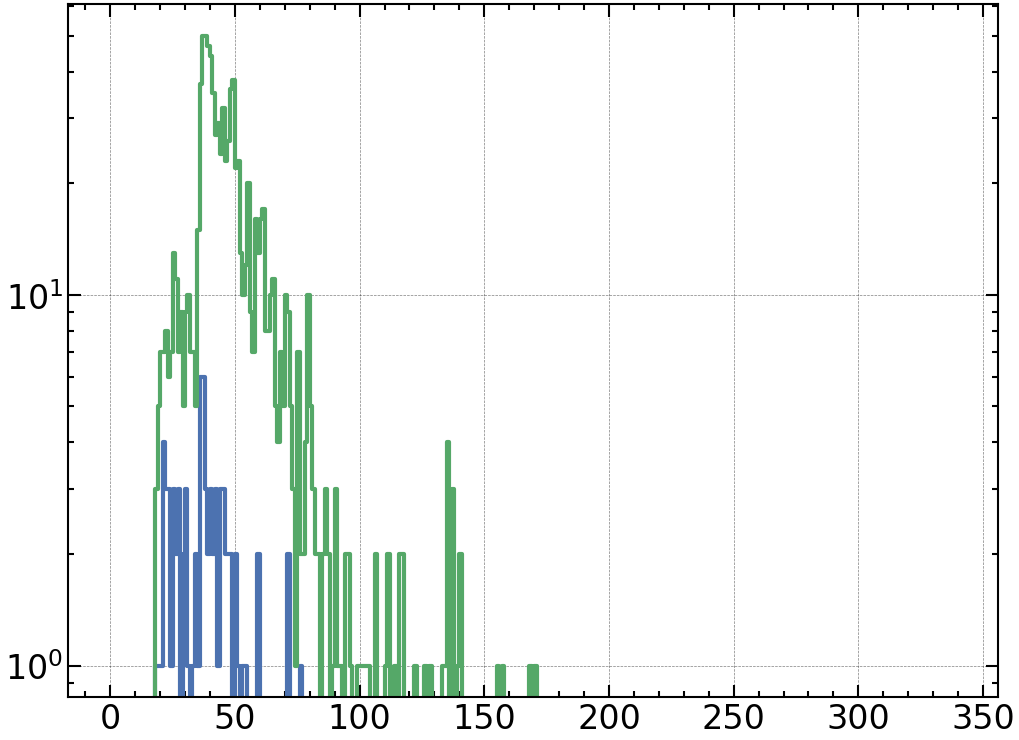

In [46]:
fig, ax = plt.subplots()

ax.step(pi_data['CHANNEL'][300],pi_data['COUNTS'][300])
ax.step(pi_data['CHANNEL'][27200],pi_data['COUNTS'][27200])

ax.set_yscale('log')

In [47]:
from matplotlib.colors import LogNorm 

In [48]:
def rebin_pha(spec_arr, datetime_arr ,rebin_sec): #spec_arr: spectrum per second
    n_ch = spec_arr.shape[1]
    extra_bins = len(spec_arr) % rebin_sec
    if extra_bins != 0:
        spec_arr = spec_arr[:-extra_bins,:]
    new_bins = int(len(spec_arr)/rebin_sec)
    new_spec_arr = spec_arr.reshape((new_bins, rebin_sec, n_ch)).sum(axis=1)
    new_tm = np.arange(new_bins)*rebin_sec


    new_datetime_arr = []
    for ii in new_tm:
        new_datetime_arr.append(datetime_arr[int(ii)])

    return new_spec_arr, new_datetime_arr

In [49]:
spec_counts, spec_time = rebin_pha(pi_data['COUNTS'],lc_data['TIME'],60)
spec_datetime = timestamp2datetime(spec_time)

channels = pi_data['CHANNEL'][0][50:250]
spec_counts = spec_counts[:,50:250]

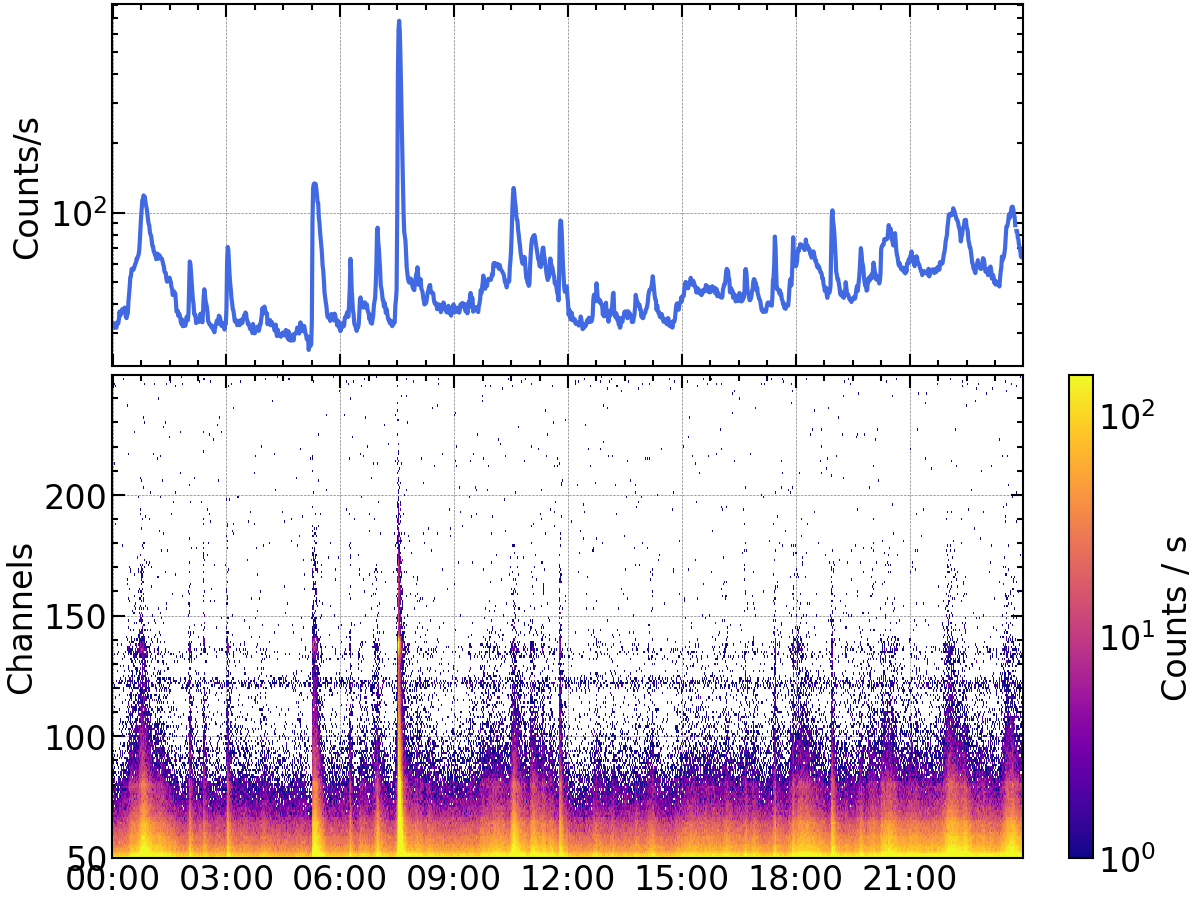

In [50]:
fig, axes = plt.subplots(2, 1, sharex=True, 
                         gridspec_kw={'height_ratios': [1.5, 2]},constrained_layout=True)
# fig.suptitle('Flare Light Curve and Spectrogram', fontsize=16)

# fig.set_size_inches(4.5,3.5)

fig.subplots_adjust(hspace=0.05,wspace=0.05)


# --- 3. Plot the Top Panel (Light Curve) ---
ax1 = axes[0]
ax1.semilogy(datetime_arr_60,lc_60, color='royalblue', label='Total Counts')
ax1.set_ylabel('Counts/s')
# ax1.grid(True, linestyle=':', alpha=0.6)
# ax1.legend()

ax2 = axes[1]
im = ax2.pcolormesh(spec_datetime, channels, spec_counts.T, cmap='plasma', shading='nearest',
                    norm=LogNorm(vmin=1, vmax=np.nanmax(spec_counts[:,50:])),rasterized=True)


ax2.set_ylabel('Channels')

# --- 5. Add a Colorbar ---
# We add a colorbar to the right of the plot to show what the colors mean.
cbar = fig.colorbar(im, ax=ax2, label='Counts / s')

ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
fig.autofmt_xdate()

# ax2.set_xlabel('2024-05-14')